## Observations and Insights 

* Only (1) mouse in the study was discovered to have duplicate data collected for the same Timepoint.  As a result, all the entries for that mouse were removed prior to the overall analysis.

* Capomulin and Ramicane were the (2) "most studied" regimens because recorded the greatest number of total measurements during the study compared with all the others.

* The 248 analyzed for the study had a fairly equal gender distribution so the observations could be logically applied to both Male and Female mice.

* There were no recorded statistical outliers in calculating the final tumor weights in the four "regimens of interest".

* Capomulin and Ramicane are regimens that continue to show promissing results in that the final recorded tumor volume for mice receiving that drug was lower than the two otehr "regimens of interest" (Infubinol & Ceftamin).

* As expected, a strong correlation was found between the measured weight of a mouse and the average size of their tumor recorded in the study.  A tumor that is a collection of excess cells increased the expected measured weight of the mouse.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import itertools

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
study_results_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_results_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice.
mouse_count = len(study_results_complete["Mouse ID"].unique())
mouse_count

249

In [6]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
get_dups_df = study_results_complete[['Mouse ID', 'Timepoint']]
get_dups_df = get_dups_df.groupby(["Mouse ID"])
# Counts the number of timepoints registered per mouse
timepointCount = get_dups_df["Timepoint"].value_counts()

# Create a dataframe with collected data
timepoint_summary_df = pd.DataFrame({"Timepoint Count": timepointCount})
# Only show mice that have duplicate timepoints
only_dups_df = timepoint_summary_df.loc[timepoint_summary_df["Timepoint Count"] > 1]
only_dups_df

Timepoint Count
Mouse ID Timepoint                 
g989     0                        2
         5                        2
         10                       2
         15                       2
         20                       2

In [8]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints
# Double checking with the .duplicate() function

#Create new column and assign it the results of duplicate function checking Mouse ID and Timepoint
study_results_complete["Duplicated"] = study_results_complete.duplicated(subset=['Mouse ID','Timepoint'])
#Only show rows determined ot be duplicates
only_dups = study_results_complete.loc[study_results_complete["Duplicated"] == True]
only_dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated
137,g989,0,45.000000,0,Propriva,Female,21,26,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


In [9]:
# Optional: Display all the data for the duplicate mouse ID.
# Show all data entries for mouse g989
drop_mouse_df = study_results_complete.loc[study_results_complete["Mouse ID"] == "g989"]
drop_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated
107,g989,0,45.000000,0,Propriva,Female,21,26,False
137,g989,0,45.000000,0,Propriva,Female,21,26,True
329,g989,5,48.786801,0,Propriva,Female,21,26,False
360,g989,5,47.570392,0,Propriva,Female,21,26,True
620,g989,10,51.745156,0,Propriva,Female,21,26,False
681,g989,10,49.880528,0,Propriva,Female,21,26,True
815,g989,15,51.325852,1,Propriva,Female,21,26,False
869,g989,15,53.442020,0,Propriva,Female,21,26,True
950,g989,20,55.326122,1,Propriva,Female,21,26,False
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


In [10]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
# Allow data where Mouse ID is not g989
study_results_clean = study_results_complete.loc[study_results_complete["Mouse ID"] != "g989"]
study_results_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated
0,b128,0,45.000000,0,Capomulin,Female,9,22,False
1,f932,0,45.000000,0,Ketapril,Male,15,29,False
2,g107,0,45.000000,0,Ketapril,Female,2,29,False
3,a457,0,45.000000,0,Ketapril,Female,11,30,False
4,c819,0,45.000000,0,Ketapril,Male,21,25,False
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,False
1889,u364,45,31.023923,3,Capomulin,Male,18,17,False
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,False
1891,x773,45,58.634971,4,Placebo,Female,21,30,False


In [11]:
# Checking the number of mice in the clean DataFrame. Same method as before
mouse_count_clean = len(study_results_clean["Mouse ID"].unique())
# Should be 1 less since only g989 was removed
mouse_count_clean

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Group data initially by regimen
volume = study_results_clean.groupby(["Drug Regimen"])

#Use functions and round at time of calculation
mean_vol = round(volume["Tumor Volume (mm3)"].mean(),2)
median_vol = round(volume["Tumor Volume (mm3)"].median(),2)
var_vol = round(volume["Tumor Volume (mm3)"].var(),2)
std_vol = round(volume["Tumor Volume (mm3)"].std(),2)
sem_vol = round(volume["Tumor Volume (mm3)"].sem(),2)

volume_summary_df = pd.DataFrame({"Vol (mm3) Mean": mean_vol,
                                  "Vol (mm3) Median": median_vol,
                                  "Vol (mm3) Variance": var_vol,
                                  "Vol (mm3) Standard Deviation": std_vol,
                                  "Vol (mm3) SEM": sem_vol})

#Display new data frame
volume_summary_df

,Vol (mm3) Mean,Vol (mm3) Median,Vol (mm3) Variance,Vol (mm3) Standard Deviation,Vol (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
round(study_results_clean.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}),2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Text(0, 0.5, 'Total Measurements Collected')

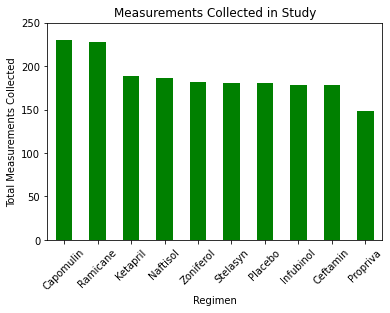

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Count each time drug is listed in data row entry
measurements = study_results_clean["Drug Regimen"].value_counts()
# Capture the index for plotting
drugs = measurements.index

# Declare the y-axis limits to the passed in
ylim = [0,250]
#Create plot object
meas_bar = measurements.plot(kind="bar", title = "Measurements Collected in Study", ylim = ylim, color="green", rot = 45)
meas_bar.set_xlabel("Regimen")
meas_bar.set_ylabel("Total Measurements Collected")


<function matplotlib.pyplot.show(*args, **kw)>

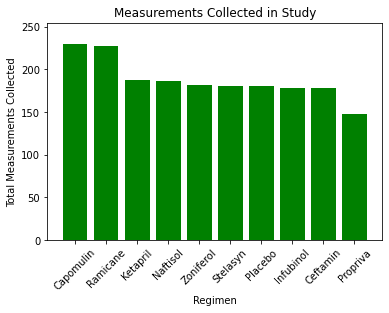

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Plot based on previously colected series
plt.bar(drugs, measurements, color='green')
plt.title('Measurements Collected in Study')
plt.xlabel('Regimen')
plt.ylabel('Total Measurements Collected')
# Show 
plt.xticks(drugs, rotation=45)
plt.ylim(0, max(measurements) + 25)
plt.show

Text(0, 0.5, '')

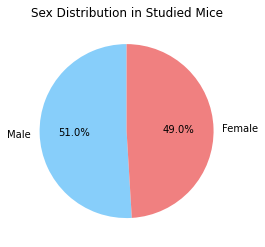

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Count number of times each gender appears in data rows
gender_counts = study_results_clean["Sex"].value_counts()

# Define color schema
colors = ["lightskyblue", "lightcoral"]

# Plot
gen_pie = gender_counts.plot(kind='pie',title='Sex Distribution in Studied Mice', startangle=90, autopct="%1.1f%%", colors = colors)

# Remove unnecessary label
gen_pie.set_ylabel("")

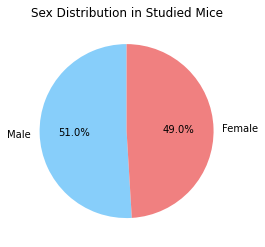

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Use gender counts captured and formatting estlablished in previous cell
plt.pie(gender_counts, labels = gender_counts.index, startangle=90, colors=colors, autopct="%1.1f%%")
plt.title("Sex Distribution in Studied Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_t = study_results_clean.loc[(study_results_clean["Drug Regimen"] == "Capomulin") | 
                        (study_results_clean["Drug Regimen"] == "Ramicane") |
                        (study_results_clean["Drug Regimen"] == "Infubinol") |
                        (study_results_clean["Drug Regimen"] == "Ceftamin")]

# Group by Mouse ID
final_t = final_t.groupby("Mouse ID")
# Find the max timepoint collected in each "group"
final_t = final_t["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_size = pd.merge(final_t, study_results_clean, how="left", on=["Mouse ID", "Mouse ID"])
# Show only final volume entries
final_tumor_size = final_tumor_size.loc[final_tumor_size["Timepoint_x"] == final_tumor_size["Timepoint_y"]]
final_tumor_size


,Mouse ID,Timepoint_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated
9,a203,45,45,67.973419,2,Infubinol,Female,20,23,False
19,a251,45,45,65.525743,1,Infubinol,Female,21,25,False
29,a275,45,45,62.999356,3,Ceftamin,Female,20,28,False
39,a411,45,45,38.407618,1,Ramicane,Male,3,22,False
49,a444,45,45,43.047543,0,Ramicane,Female,10,25,False
...,...,...,...,...,...,...,...,...,...,...
773,y769,45,45,68.594745,4,Ceftamin,Female,6,27,False
783,y793,45,45,31.896238,2,Capomulin,Male,17,17,False
793,y865,45,45,64.729837,3,Ceftamin,Male,23,26,False
803,z578,45,45,30.638696,0,Ramicane,Male,11,16,False


In [19]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_data_plot = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
volume_data = final_tumor_size.iloc[:,3]

quartiles = volume_data.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volumes is: 37.19
The upper quartile of tumor volumes is: 59.93
The interquartile range of tumor volumes is: 22.74
The the median of volumes is: 45.0 
Values below 3.08 could be outliers.
Values above 94.04 could be outliers.


In [31]:
#Sort to help recognize outliers
just_volumes = volume_data
just_volumes.sort_values()

354    22.050126
602    23.343598
452    28.430964
729    28.484033
235    29.128472
         ...    
382    67.748662
9      67.973419
773    68.594745
344    68.923185
130    72.226731
Name: Tumor Volume (mm3), Length: 100, dtype: float64

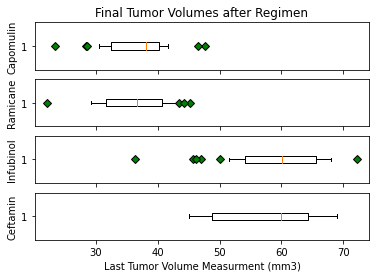

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Separate the data by regiment and capture the related volumes
capo_vol = final_tumor_size.loc[final_tumor_size["Drug Regimen"] == "Capomulin"]
capo_vol = capo_vol.iloc[:,3]
rami_vol = final_tumor_size.loc[final_tumor_size["Drug Regimen"] == "Ramicane"]
rami_vol = rami_vol.iloc[:,3]
infu_vol = final_tumor_size.loc[final_tumor_size["Drug Regimen"] == "Infubinol"]
infu_vol = infu_vol.iloc[:,3]
ceft_vol = final_tumor_size.loc[final_tumor_size["Drug Regimen"] == "Ceftamin"]
ceft_vol = ceft_vol.iloc[:,3]

# Prepare the data to share the same figure the design the outlier markings
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
green_diamond = dict(markerfacecolor='g', marker='D')

# Capomulin Regimen and design
ax1.set_title('Final Tumor Volumes after Regimen')
ax1.set_xlim(min(volume_data)-2, max(volume_data)+2)
ax1.boxplot(capo_vol, vert=False, showfliers=True, flierprops=green_diamond, whis=0.30)
ax1.set_ylabel("Capomulin")

# Ramicane plot
ax2.boxplot(rami_vol, vert=False, showfliers=True, flierprops=green_diamond, whis=0.30)
ax2.set_ylabel("Ramicane")

# Infubinol plot
ax3.boxplot(infu_vol, vert=False, showfliers=True, flierprops=green_diamond, whis=0.30)
ax3.set_ylabel("Infubinol")

# Ceftamin plot
ax4.boxplot(ceft_vol, vert=False, showfliers=True, flierprops=green_diamond, whis=0.30)
ax4.set_ylabel("Ceftamin")
ax4.set_xlabel("Last Tumor Volume Measurment (mm3)")

plt.show()

## Line and Scatter Plots

In [21]:
#Just a helpful mouse check for r944
mouse_check_df = study_results_clean.loc[(study_results_clean["Mouse ID"] == "r944")]
mouse_check_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated
239,r944,0,45.000000,0,Capomulin,Male,12,25,False
432,r944,5,45.737145,0,Capomulin,Male,12,25,False
630,r944,10,46.544292,0,Capomulin,Male,12,25,False
761,r944,15,47.373423,0,Capomulin,Male,12,25,False
1001,r944,20,43.225671,1,Capomulin,Male,12,25,False
1118,r944,25,41.086991,1,Capomulin,Male,12,25,False
1412,r944,30,41.680791,1,Capomulin,Male,12,25,False
1556,r944,35,40.401765,2,Capomulin,Male,12,25,False
1650,r944,40,41.042045,2,Capomulin,Male,12,25,False
1888,r944,45,41.581521,2,Capomulin,Male,12,25,False


<function matplotlib.pyplot.show(*args, **kw)>

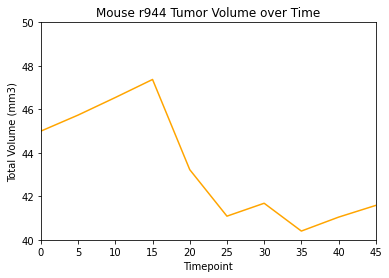

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Mouse checked in previous cell r944, capture data points
r944_vol = mouse_check_df.iloc[:,2]
r944_time = mouse_check_df.iloc[:,1]

plt.plot(r944_time, r944_vol, color="orange")

# Format plot
plt.title('Mouse r944 Tumor Volume over Time')
plt.xlabel('Timepoint')
plt.ylabel('Total Volume (mm3)')
plt.xlim(0, 45)
plt.ylim(40, 50)
plt.show

(14.0, 26.0)

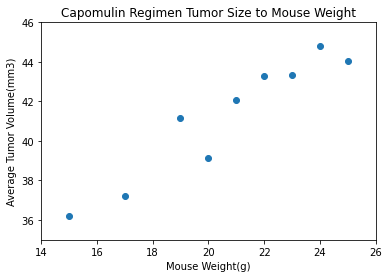

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Capture only Capomulin entries
capomulin_only_df = study_results_clean.loc[(study_results_clean["Drug Regimen"] == "Capomulin")]
# Group by the weights of Capomulin mice
capomulin_only_df = capomulin_only_df.groupby("Weight (g)")
capomulin_only_df = capomulin_only_df["Tumor Volume (mm3)"].mean()

# Index is the mouse weight
x_values = capomulin_only_df.index
# Capture the average tumore volumes as requested
y_values = capomulin_only_df

# Plot
plt.scatter(x_values,y_values)
plt.title("Capomulin Regimen Tumor Size to Mouse Weight")
plt.ylabel('Average Tumor Volume(mm3)')
plt.xlabel('Mouse Weight(g)')
plt.ylim(35, 46)
plt.xlim(14, 26)

## Correlation and Regression

The correlation coefficient between mouse weight and avg tumor volume is 0.95
The r-squared is: 0.9034966277438602


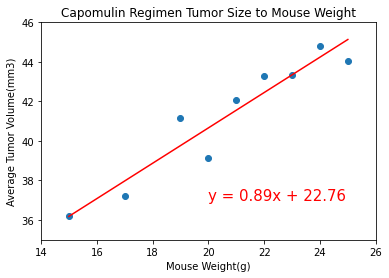

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.title("Capomulin Regimen Tumor Size to Mouse Weight")
plt.ylabel('Average Tumor Volume(mm3)')
plt.xlabel('Mouse Weight(g)')
plt.ylim(35, 46)
plt.xlim(14, 26)

# Print the figures
print(f"The correlation coefficient between mouse weight and avg tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")